In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
   sys.path.append(project_root)

from source.utils.minio_helper import read_df_from_minio

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Agar list panjang tidak terpotong

BUCKET_NAME = "mlbb-lake"

In [4]:
print("📥 Loading Silver Data...")
df_draft = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_heroes.parquet", file_format='parquet')
df_enriched = read_df_from_minio(BUCKET_NAME, "silver/silver_draft_enriched.parquet", file_format='parquet')
df_dq = read_df_from_minio(BUCKET_NAME, "silver/silver_data_quality.parquet", file_format='parquet')

print(f"1. Draft Heroes (Base): {df_draft.shape if df_draft is not None else 'Gagal'}")
print(f"2. Enriched Data: {df_enriched.shape if df_enriched is not None else 'Gagal'}")
print(f"3. Data Quality Issues: {df_dq.shape if df_dq is not None else '0 Issues (Perfect)'}")

📥 Loading Silver Data...
[MINIO] Error Read: silver/silver_data_quality.parquet: S3 operation failed; code: NoSuchKey, message: The specified key does not exist., resource: /mlbb-lake/silver/silver_data_quality.parquet, request_id: 1883B727E3544AD9, host_id: dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8, bucket_name: mlbb-lake, object_name: silver/silver_data_quality.parquet
1. Draft Heroes (Base): (8276, 11)
2. Enriched Data: (8276, 21)
3. Data Quality Issues: 0 Issues (Perfect)


In [5]:
print(df_draft.head())

   match_id region  tournament team_side team_name phase  order  \
0         1     ID  MPL ID S16      left  ONICONIC  pick      1   
1         1     ID  MPL ID S16      left  ONICONIC  pick      2   
2         1     ID  MPL ID S16      left  ONICONIC  pick      3   
3         1     ID  MPL ID S16      left  ONICONIC  pick      4   
4         1     ID  MPL ID S16      left  ONICONIC  pick      5   

  hero_name_normalized  is_winner_team     source_file          ingested_at  
0                 cici            True  mpl_id_s16.csv  2025-12-20 22:11:18  
1                  joy            True  mpl_id_s16.csv  2025-12-20 22:11:18  
2               pharsa            True  mpl_id_s16.csv  2025-12-20 22:11:18  
3               claude            True  mpl_id_s16.csv  2025-12-20 22:11:18  
4                hylos            True  mpl_id_s16.csv  2025-12-20 22:11:18  


In [6]:
df_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_id              8276 non-null   int64 
 1   region                8276 non-null   object
 2   tournament            8276 non-null   object
 3   team_side             8276 non-null   object
 4   team_name             8276 non-null   object
 5   phase                 8276 non-null   object
 6   order                 8276 non-null   int64 
 7   hero_name_normalized  8276 non-null   object
 8   is_winner_team        8276 non-null   bool  
 9   source_file           8276 non-null   object
 10  ingested_at           8276 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 654.8+ KB


In [7]:
print(df_draft.groupby("match_id").size().describe())

count    414.000000
mean      19.990338
std        0.097937
min       19.000000
25%       20.000000
50%       20.000000
75%       20.000000
max       20.000000
dtype: float64


In [8]:
print(df_draft["hero_name_normalized"].value_counts().head(10))

hero_name_normalized
zhuxin       379
baxia        373
wanwan       351
cici         340
yisunshin    336
lancelot     334
fanny        326
kalea        322
harith       299
arlott       287
Name: count, dtype: int64


In [16]:
df_enriched.head()

,match_id,region,tournament,team_side,team_name,phase,order,hero_name_normalized,is_winner_team,source_file,ingested_at,win_rate,pick_rate,ban_rate,role,lane,speciality,tier_score,score,counter_score,processed_at
0,1,ID,MPL ID S16,left,ONICONIC,pick,1,cici,True,mpl_id_s16.csv,2025-12-20 22:11:18,50.48,1.08,14.72,fighter,exp lane,"Damage, Regen",4,306.0420,-0.68,2025-12-21 18:09:04
1,1,ID,MPL ID S16,left,ONICONIC,pick,2,joy,True,mpl_id_s16.csv,2025-12-20 22:11:18,51.36,0.46,3.62,assassin,jungle,"Chase, Damage",2,134.3650,0.00,2025-12-21 18:09:04
2,1,ID,MPL ID S16,left,ONICONIC,pick,3,pharsa,True,mpl_id_s16.csv,2025-12-20 22:11:18,49.17,0.94,0.92,mage,mid lane,"Burst, Poke",1,99.8831,0.00,2025-12-21 18:09:04
3,1,ID,MPL ID S16,left,ONICONIC,pick,4,claude,True,mpl_id_s16.csv,2025-12-20 22:11:18,52.40,0.67,0.25,marksman,gold lane,"Burst, Chase",0,92.2430,0.00,2025-12-21 18:09:04
4,1,ID,MPL ID S16,left,ONICONIC,pick,5,hylos,True,mpl_id_s16.csv,2025-12-20 22:11:18,50.44,0.45,0.82,tank,roam,"Guard, Initiator",1,98.9064,0.00,2025-12-21 18:09:04


In [9]:
print(df_enriched[
   ["hero_name_normalized", "win_rate", "tier_score", "counter_score"]
].head(10))

  hero_name_normalized  win_rate  tier_score  counter_score
0                 cici     50.48           4          -0.68
1                  joy     51.36           2           0.00
2               pharsa     49.17           1           0.00
3               claude     52.40           0           0.00
4                hylos     50.44           1           0.00
5               wanwan     49.41           1           0.00
6            yisunshin     52.79           5           0.00
7                fanny     44.26           3           0.00
8               selena     47.01           0           0.00
9               uranus     50.66           1           0.00


In [10]:
df_enriched_raw = df_enriched.replace(0, None)

print(df_enriched_raw.isnull().mean())

match_id                0.000000
region                  0.000000
tournament              0.000000
team_side               0.000000
team_name               0.000000
phase                   0.000000
order                   0.000000
hero_name_normalized    0.000000
is_winner_team          0.000000
source_file             0.000000
ingested_at             0.000000
win_rate                0.000000
pick_rate               0.000000
ban_rate                0.000000
role                    0.000000
lane                    0.000000
speciality              0.000000
tier_score              0.105607
score                   0.000000
counter_score           0.744442
processed_at            0.000000
dtype: float64


In [11]:
print(df_enriched[df_enriched["phase"] == "pick"]["counter_score"].describe())

count    4139.000000
mean       -0.000051
std         0.553104
min        -4.620000
25%         0.000000
50%         0.000000
75%         0.040000
max         3.600000
Name: counter_score, dtype: float64


<Axes: >

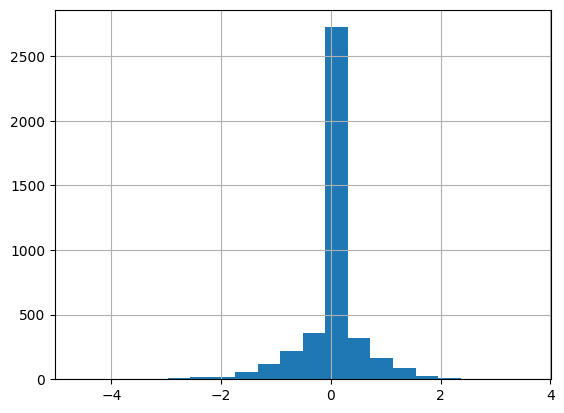

In [12]:
df_enriched[df_enriched["phase"] == "pick"]["counter_score"].hist(bins=20)

In [13]:
sample_match = df_enriched[df_enriched["match_id"] == 1]

print(sample_match[
   ['team_name', "team_side", "phase", "hero_name_normalized", "counter_score"]
])

          team_name team_side phase hero_name_normalized  counter_score
0          ONICONIC      left  pick                 cici          -0.68
1          ONICONIC      left  pick                  joy           0.00
2          ONICONIC      left  pick               pharsa           0.00
3          ONICONIC      left  pick               claude           0.00
4          ONICONIC      left  pick                hylos           0.00
5          ONICONIC      left   ban               wanwan           0.00
6          ONICONIC      left   ban            yisunshin           0.00
7          ONICONIC      left   ban                fanny           0.00
8          ONICONIC      left   ban               selena           0.00
9          ONICONIC      left   ban               uranus           0.00
10  Dewa UnitedDEWA     right  pick            esmeralda           0.00
11  Dewa UnitedDEWA     right  pick             lancelot           0.68
12  Dewa UnitedDEWA     right  pick              helcurt        

In [14]:
print(df_enriched.groupby(["match_id", "team_side"])["is_winner_team"].mean().head())

match_id  team_side
1         left         1.0
          right        0.0
2         left         1.0
          right        0.0
3         left         0.0
Name: is_winner_team, dtype: float64


In [15]:
if df_dq is not None:
   df_dq["issue_type"].value_counts()